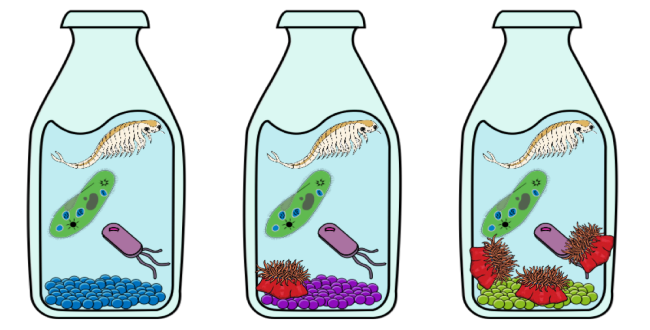

# **_Microcosm Data Analysis_** 

# Part 0: Introduction

Welcome to this Data Analysis Workshop! This workshop is designed to refresh your skills in data analysis using Python. We will be using the modules pandas, seaborn, and scipy. We will cover some fundamental concepts of data analysis, and practice the puting them into practice in an appropriate fashon. 

By the end of this workshop, you will have a better understanding of how to do the following:

-_Download and view our data_

-_Use decision tools to choose appropriate plots for your data_

-_Use data visualisation tools to make plots_

-_Learn how to choose the right statistical test for your data_

-_Perform appropriate statistical tests on your data_

But first let's think about our objectives for the Microcosm experiment. It's good to have these in mind as we explore our data.

<div class="alert alert-info">
"To investigate how predation by sea anemones affect the demographic characteristics -
population abundance and make up (sex-ratio and/or juvenile stages) of brine shrimp, as well as
the effects of predation on the nitrogen cycle in this three-level trophic system"
</div>



### Hypotheses


Before we start our data analysis, indeeed before we started our experminent, we should have in mind a hypothesis.

**What is our biological (alternative) hypothesis $(H_{A})$?** 

**What is our null hypothesis $(H_{0})$?** 




## Task 0:

Write down your hypotheses for this experiment:

Biological Hypothesis: 

Null Hypothesis:

# Part 1: Your data

Ok, now we have some predictions about the results of our experiment we need some data to analyse. Your data should be available here: https://uoe-my.sharepoint.com/:x:/r/personal/dmcclean_ed_ac_uk/Documents/Microcosm%20Class%20data%20sheet%202026.xlsx?d=w0dbb52785f4e4fb7aba026b6a09896f0&csf=1&web=1&e=CQG5yB&nav=MTVfezAwMDAwMDAwLTAwMDEtMDAwMC0wMDAwLTAwMDAwMDAwMDAwMH0 


If you haven't done so already, download a copy as an excel file (.xlsx) into a local folder and upload to Noteable for analysis ("Upload" button on the right hand side). Upload it to the same folder in which you find this notebook, this will keep everything in the same place and avoid long file addresses when loading the data.


## Task 1: Read in and print your group's data

Using pandas, you are now going to read in the excel spreadsheet and call it something sensible.

1. To read in excel spreadsheets we use the command `pd.read_excel(filename)`. Do this now, calling the DataFrame something sensible, such as `micros`.

2. Print the data to make sure it is okay.

In [ ]:
# read and print your dataset

import pandas as pd

micros = 

#To display the first 50 rows of the dataframe we use the .head() method 
#... but equally you could just call the name of the dataframe here



### Are our data 'tidy'?

When it comes to data analysis there is a specific way of organising your raw data which makes it easier to visualise and analyse. This organisation of data, known as 'tidy' data, is a simple but effective way making sure our data frame is easy to read and access. 

### The Three Rules of Tidy Data

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

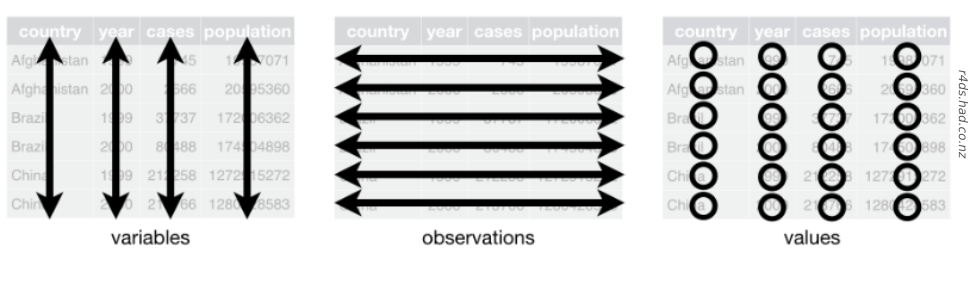

Why ensure that your data is tidy? There are two main advantages:

There’s a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it’s easier to learn the tools that work with it because they have an underlying uniformity.

There’s a specific advantage to placing variables in columns because it allows programming languages to see each column as a list or vector.

### You may have noticed from looking at our data that it is currently **not** in a tidy format. 😢

Ok, don't panic... our data just needs some rearrangment, thankfully the pandas module has lots of methods to help. 

Check out this really useful cheatsheet with some of the ways we can manipulate our data into the right shape:

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

This will help explain what the code below is doing: **But don't worry if you don't understand it all now.**  

In [ ]:
import pandas as pd

# 1. Define three lists containing ID columns and our two measurement columns
id_cols = [
    "Date", "Day", "Experiment day", "Tank number", "Predation",
    "Turbidity", "Temperature", "Adjusted salinity", "PH",
    "Ammonia", "Nitrite", "Nitrate"
]

density_cols = [
    "Shrimp density",
    "Male density",
    "Female density",
    "Pair density",
    "Juvenile density",
    "Larval density"
]

population_cols = [
    "Shrimp population",
    "Male population",
    "Female population",
    "Pair population",
    "Juvenile population",   
    "Larval population"
]

# 2. Make the first of two new dataframes, reshaping to long format with density as our response variable (our value)

micros_density_long = micros.melt(
    id_vars=id_cols,
    value_vars=density_cols,
    var_name="Stage",
    value_name="Density"
)

#At this midway point, you could always have a look at the dataset that we've created by typing the name (micros_density_long). 
#But if you do that, you'll see that we still have quite a long way to go to reshape our dataset.  

# turn e.g. "Male density" into "Male"
micros_density_long["Stage"] = micros_density_long["Stage"].str.replace(" density", "", regex=False)


# 3. Same as step two but this time we reshape to long format for population
micros_pop_long = micros.melt(
    id_vars=id_cols,
    value_vars=population_cols,
    var_name="Stage",
    value_name="Population"
)

# turn e.g. "Male population" into "Male"
# and "Juvenile poulation" into "Juvenile"
micros_pop_long["Stage"] = micros_pop_long["Stage"].str.replace(" population", "", regex=False)

# 4. Finally we merge density and population on IDs + stage
micros_long = pd.merge(
    micros_density_long,
    micros_pop_long,
    on=id_cols + ["Stage"],
    how="outer"
)

#Check out our new dataset!

micros_long.head(50)



Okay, that looks better!

Now if all that code looks a little bit daunting then let this be a lesson: **Organise your data in a tidy format before you start entering numbers!!**

# Part 2: Exploring variables

A variable has two defining properties.

1. a variable is any characteristic of a person, place, thing, or idea that can be measured.
2. the value of that variable can vary from one entity to another.

Examples of variables: Eye colour, height, weight, temperature, pH, leaf shape and butterfly wing shape 
*All of these can be measured, and all vary from one individual to another.*

Hopefully, when we designed our experiment we decided on variables to measure that have good explanitory power. These will help us accept or reject our null hypothesis. 

We also need to identify what type of variables we will be working with. 

Remember there are two main types of variable: **categorical variables** and **numerical variables**.

### Categorical variables

Categorical variables describe **qualitative** characteristics of individuals. A characteristic may have two or more values, or categories. 

There are two types of categorical variable: **categorical nominal** and **categorical ordinal**.

Nominal means "name". The following table lists some examples of categorical nominal variables.

Variable | Values or categories
:--- | :---
Blood group | O+, O-, A+, A-, B+, B-, AB+, AB-
Sex chromosome genotype | XX, XY, XO, XXY, XYY
Eye colour | brown, blue, green, hazel, grey
Survival | alive, dead

Ordinal means "having order". The categories have an inherent temporal or spatial order to them. The following table lists some examples of categorical nominal variables.

Variable | Values or categories
:--- | :---
Life stage | Egg, larva, juvenile, adult
Age class | 0-4 years, 5-9 years, 10-14 years, etc.
Rank | 1<sup>st</sup>, 2<sup>nd</sup>, 3<sup>rd</sup>, etc.


### Numercal variables

Numerical data are measurements on individuals that have magnitude. They describe **quantitative** characteristics of individuals. 

Numerical variables can be either **continuous** or **discrete**. 

Characteristics that have a decimal point in them are continuous variables. For example,

Variable | Values
:--- | :---
Body temperature | 37.5 $^\circ$C
Territory size| 4.5 m<sup>2</sup>
Concentration | 0.5 Molar

Characteristics that are discrete are generally counts. For example,

Variable | Values
:--- | :---
Number of amino acids | 546
Harem size | 5
Bird nests per tree | 11

#### Explanitory vs Response Variables 

So we know the type of data our variable contains, but there is an extra distinction it is important to make when ploting and analysisng our data: whether it is an explanitory or resonce variable.

These two additional types of variables are improtant to understand in statistics and overlay our previous variable types, i.e. **both response and explanitory variables can be either categorical or numerical.** 

**Explanatory Variable:** Sometimes referred to as an independent variable or a predictor variable, this variable explains the variation in the response variable.

**Response Variable:** Sometimes referred to as a dependent variable or an outcome variable, the value of this variable responds to changes in the explanatory variable. 


## Task 2: Choose Variables to Analyse

With this in mind let's think about which variables we are interested in plotting to visualise our data and help us understand the patterns of change within our tanks.  

A good starting place might be this site: https://www.data-to-viz.com/ which shows you some data visualisations appropriate to your data types. Use the 'explore' button to find a graph type that suits our data. 

**Which of the variables in our data set are categorical? Which are numeric?**

**If we were to pick two variables to analyse and plot, which would be the explanitory and which the response variable?**

# Part 3: Plotting our Data

Good data visualization is a powerful tool in the biological sciences, helping researchers to effectively communicate complex data and results. It's going to form an essential part of any scientific report, theisis, or paper you will ever write so it's and important skill to practice. 

(Not only that, data visualisation skills are applicable well outside the realms of biology so very transferable!)

Let's start with an example of a graph that we may well want to create to track the numbers of shrimp alive in our tanks at each time point. 

As I am interested initially in visualising the number of shrimp (discrete numerical) over time, I'm going to create a line plot using seaborn.lineplot() https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
#Remember when using a new module we need to 'import', we say 'as sns' here just as an abreviation
import seaborn as sns

#You may notice I have broken this graph code down across multiple lines for readability
sns.lineplot(data = micros_long, 
             x="Experiment day", 
             y="Population",); #<----This semicolon is a quirk of jupyter notebooks and stops additional plots


The above graph looks about right but there are some issues: the axis labels are the names of our columns (not very presentable), and the graph has no title. 

**Can you correct this below?**

In [ ]:
shrimp= sns.lineplot(data = micros_long, 
             x="Experiment day", 
             y="Population",)
#add code here to set axis labels


Ok, so now your plot looks a little neater but one 'trick' we're missing here is to separate out those tanks with and without predation to help us visualise the effect of 'predation' on shrimp numbers. we can do this with the argument 'hue'.

In [ ]:
sns.lineplot(data = micros_long, 
             x="Experiment day", 
             y="Population",
            hue = "Predation");

Ok, so this graph is an important one. One of our main goals for this experiment was to track population abundence. 

**Can you add to this graph or adapt it to your own needs?**

There are some other variables of interest here. We are also interested in how shrimp numbers are correlated with chemical indicators like Nitrate. 

This time we'll use a 'sns.scatterplot()' because we are plotting two numeric variables agaist one another.

In [ ]:
sns.scatterplot()

#### Saving your graph

In [ ]:
shrimp = sns.scatterplot() ##Whatever your graph above may be! I've just assigned mine to a variable called 'shrimp'

#Then simply add these lines to the end of your code.
shrimp_fig = shrimp.get_figure()
shrimp_fig.savefig('shrimpvsNO2.jpg')

## Task 3: Choose another visualisation

**This time you're on your own!**

Pick two (or more, if appropraite) relavant variables to visualise using the modules we've used above.  

Don't forget this handy website to aid your choice! https://www.data-to-viz.com/ 

And don't forget to upload your successes and failiures (both valid) to our padlet page:
https://padlet.com/btopad/environment-1d-data-visualisation-23zpefzm2ceg1h3 

In [ ]:
##What graph will you create?


# Part 4: Statistical Analysis

### Parametric vs Non-parametric

Parametric and nonparametric statistical tests are two different approaches to statistical hypothesis testing. The main **difference between the two is the assumption about the underlying population distribution.**

**Parametric tests** are based on the **assumption that the population follows a specific probability distribution**, usually the normal distribution. Examples of parametric tests include t-tests, ANOVA, and linear regression. These tests make use of the population parameters (mean and variance) to determine the significance of the results.

**Nonparametric tests**, on the other hand, **do not make any assumptions about the underlying population distribution.** Instead, they use the rank or ordering of the data to perform the hypothesis test. Examples of nonparametric tests include Wilcoxon rank-sum test, Kruskal-Wallis test, and Mann-Whitney U test. Nonparametric tests are useful when the data do not meet the assumptions of parametric tests or when the sample size is small.

In general, parametric tests are more powerful than nonparametric tests, but they are also more sensitive to violations of their assumptions. If the assumptions of a parametric test are not met, the results can be misleading, while nonparametric tests are less sensitive to such violations.

### How to Choose a Parametric Test

The most common types of parametric test include regression tests, comparison tests, and correlation tests.

#### Regression tests
Regression tests look for cause-and-effect relationships. They can be used to estimate the effect of one or more continuous variables on another variable.

#### Comparison tests
Comparison tests look for differences among group means. They can be used to test the effect of a categorical variable on the mean value of some other characteristic.

T-tests are used when comparing the means of precisely two groups (e.g., the average heights of men and women). ANOVA and MANOVA tests are used when comparing the means of more than two groups (e.g., the average heights of children, teenagers, and adults).

#### Correlation tests
Correlation tests check whether variables are related without hypothesizing a cause-and-effect relationship.

These can be used to test whether two variables you want to use in (for example) a multiple regression test are autocorrelated.

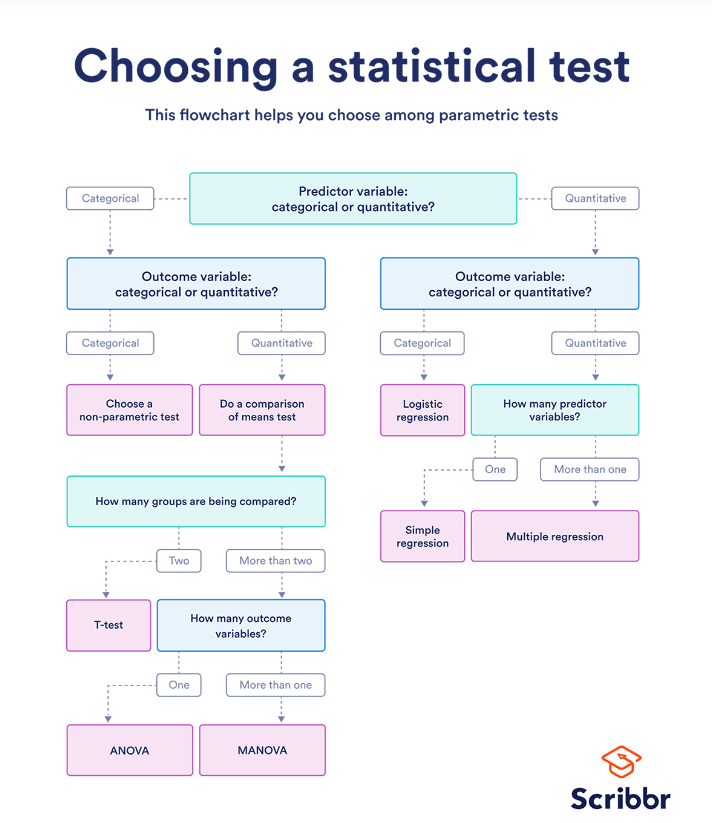

### How to Choose a Non-parametric Test
For most parametric test you come across there is a non-parametric equivelant to use if you believe the assumption of normally distributed data has been violated. 

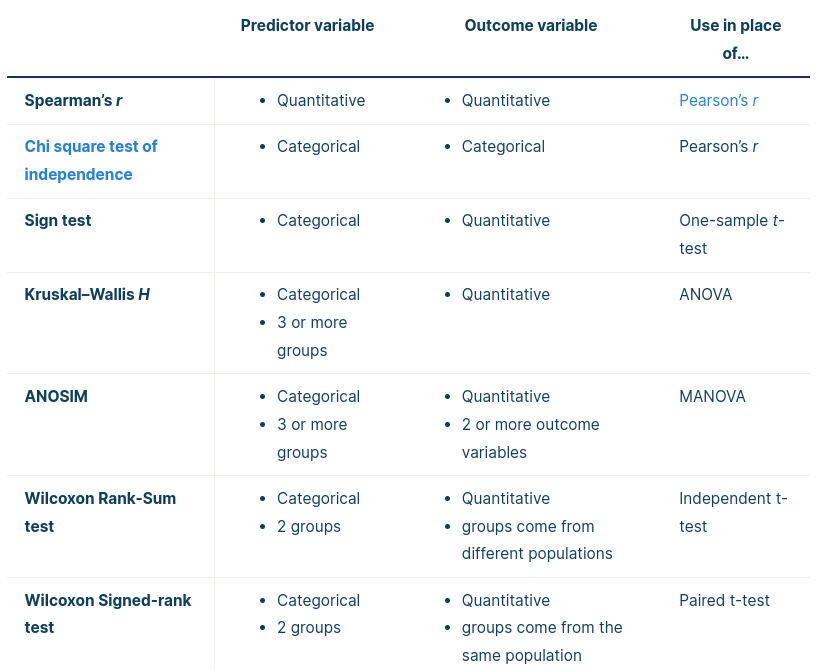

To read more about choosing stats tests and to see the original source of the above figures check out:

https://www.scribbr.com/statistics/statistical-tests/


## Task 4: Choose an appropriate test

Use the above resources and flow chart to decide on an appropriate test for our data.

I'm going to run with an example to demonstrate the kind of decision making and process involved in choosing and applying statistical tests. 

## Example 

### Hypothesis:
    
    The number of male shrimp positively correlates with nitrate level.

**Variable 1:** The number of male shrimp (Population value when life stage column = male) 

**Variable 2:** The nitrate level (measured from that same subset of the data)



Firstly, because I'm taking two bits of data from different parts of our spreadsheet I will have to do some trimming and rearranging of our table. 

In [ ]:
#I'm going to use the square bracket function of Panadas to 'subset' my micros dataframe
# I use the logical equals '==' to pick out all rows where Stage is equal to 'Male'

micros_male = micros_long[micros_long["Stage"]=="Male"]

#To display the first 10 rows of the dataframe we use the .head() method again

micros_male

Excellent now we have a section from just containing data for males.

In [ ]:
sns.scatterplot(data=micros_male, x="Nitrate", y="Population");

There seems to be no correlation between these two variables: but how can we test that?

Well, first lets decide if we need a parametric or non-parametric test.

Is our data normally distributed?

In [ ]:
#a quick histogram will give me a hint
sns.histplot(data=micros_male, x="Population");

Mmmm, not particularly, but hard to tell from this...  

So, let's use a test to formally see: the Shapiro-Wilk test for normality. 

The null hypothesis for this test is that the data are drawn from the normal distribution (p<0.05 = not normal!) 

In [ ]:
from scipy.stats import shapiro

shapiro(x=micros_male["Population"].dropna())

No, not normal at all!  

So, I'm going to stick with a non-parametric test that does not make normality assumptions about my data: a Spearmans Rank correlation. 

We have a few 'NaN' values in our new data frame: unfortunately these will need to be removed before further analysis. I use the .dropna method from Pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html 

In [ ]:
micros_male_clean = micros_male.dropna()

In [ ]:
from scipy.stats import spearmanr

#calculate Spearman Rank correlation and corresponding p-value
spearmanr(micros_male_clean['Nitrate'],micros_male_clean['Population'])


So it would apear that my impression from the scatterplot were acurate there is no correlation between Male population size and Nitrate levels (r= -0.031, p= 0.889)

## Now give it a go yourself! 

You don't have to choose the same variables, you don't have to slice and dice your dataset as I have, you can pick any variable you think will be interesting to examine, and you don't have to get it right first time. Practice makes perfect and this is a great time to try, fail, and learn. 